<a href="https://colab.research.google.com/github/sibelcelen/DSA210/blob/main/eda-hypothesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ April 18 – Checklist
“Collect the data, conduct exploratory data analysis methods and hypothesis tests on the data”


🟢 **Collect the data**

✔️ Data was cleaned, standardized, and converted (e.g., Price formatting)


🟢 **Conduct EDA (Exploratory Data Analysis)**

✔️ Distributions, boxplots, scatterplots, histograms

✔️ Group comparisons (Shopping vs No Shopping, Impulse vs Planned)

✔️ Complex insights (sleep-stress, social media behavior, spending patterns)

✔️ Visual patterns were clearly interpreted


🟢 **Hypothesis Testing**


✔️ *Independent t-tests for:*

Shopping vs Non-Shopping (Stress)

Impulse vs Planned (Stress)


✔️ *Chi-square tests for:*

Weather vs Shopping

Time of Day vs Shopping


✔️ *Correlation matrix:*

Social Media, Sleep, Price, Stress



In [2]:
#the whole data printe dout
import pandas as pd

url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTqFVknur9I0lpkPxNEIigp7NG1qlat_p9ErnQdbGhNQbMYpqwOhY5zld_riDO9qqfpzwqE2vvzfC2D/pub?output=csv'
df = pd.read_csv(url)
print(df)


          Date Shopping? Impulse/Planned       Category        Reason  \
0   12.03.2025       YES         IMPULSE        Fashion  Stress-based   
1   13.03.2025        NO             NaN            NaN           NaN   
2   14.03.2025       YES         PLANNED           Food    Need-based   
3   15.03.2025        NO             NaN            NaN           NaN   
4   16.03.2025        NO             NaN            NaN           NaN   
5   17.03.2025       YES         IMPULSE         Beauty       Boredom   
6   18.03.2025        NO             NaN            NaN           NaN   
7   19.03.2025       YES         PLANNED          Other    Need-based   
8   20.03.2025        NO             NaN            NaN           NaN   
9   21.03.2025        NO             NaN            NaN           NaN   
10  22.03.2025        NO             NaN            NaN           NaN   
11  23.03.2025       YES         PLANNED  Entertainment        Reward   
12  24.03.2025       YES         PLANNED         Be

In [3]:
# -------------------------
# 🧾 1. Dataset Info
# -------------------------
print("🔹 Dataset Info:")
print(df.info())
print("\n")

# -------------------------
# 🔤 2. Data Types
# -------------------------
print("🔹 Data Types:")
print(df.dtypes)
print("\n")

# -------------------------
# 📊 3. Descriptive Summary
# -------------------------
print("🔹 Statistical Summary:")
print(df.describe(include="all"))  # includes categorical too

🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  50 non-null     object 
 1   Shopping?             32 non-null     object 
 2   Impulse/Planned       13 non-null     object 
 3   Category              13 non-null     object 
 4   Reason                14 non-null     object 
 5   Price                 13 non-null     object 
 6   Stress Level          32 non-null     float64
 7   Sleep Quality         32 non-null     float64
 8   Social Media Use (h)  30 non-null     float64
 9   Weather               32 non-null     object 
 10  Day Of the Week       50 non-null     object 
 11  Time of Day           13 non-null     object 
 12  Notlar                5 non-null      object 
dtypes: float64(3), object(10)
memory usage: 5.2+ KB
None


🔹 Data Types:
Date                     object
Shopping? 

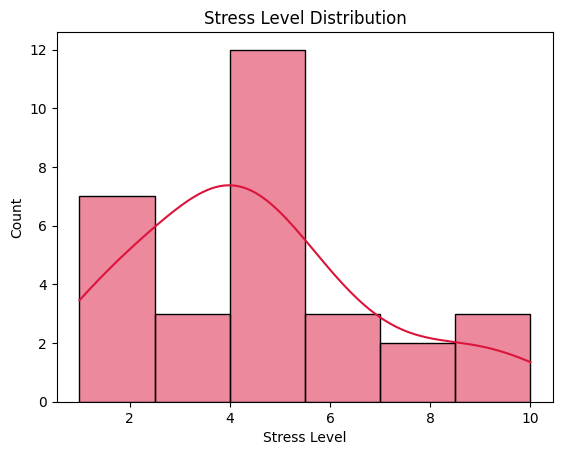

In [12]:
#Stress level distribution
sns.histplot(df["Stress Level"], bins=6, kde=True, color="crimson")
plt.title("Stress Level Distribution")
plt.xlabel("Stress Level")
plt.show()
#The stress levels are fairly distributed across the scale, with
#concentrations around levels 2, 3, and 5. This indicates a diverse range of emotional states in the dataset — a good thing for comparison purposes.

<ipython-input-16-f0bd96639093>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Shopping?", data=df, palette="Set2")


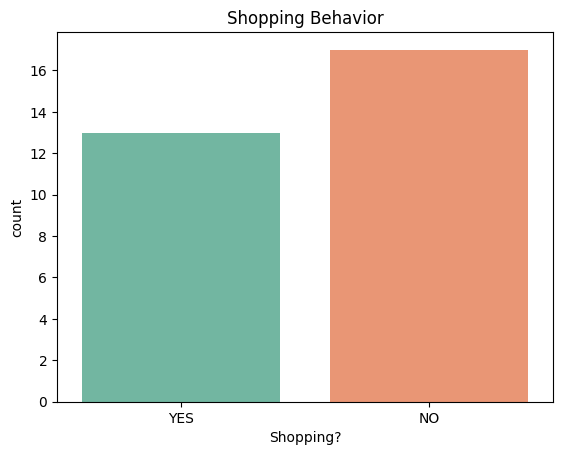

In [16]:
#Shopping behaviour count
sns.countplot(x="Shopping?", data=df, palette="Set2")
plt.title("Shopping Behavior")
plt.show()
#The number of shopping and non-shopping days are balanced, making the dataset reliable for t-tests and behavioral comparisons.

<ipython-input-17-b604813f0f81>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Shopping?", y="Stress Level", data=df, palette="pastel")


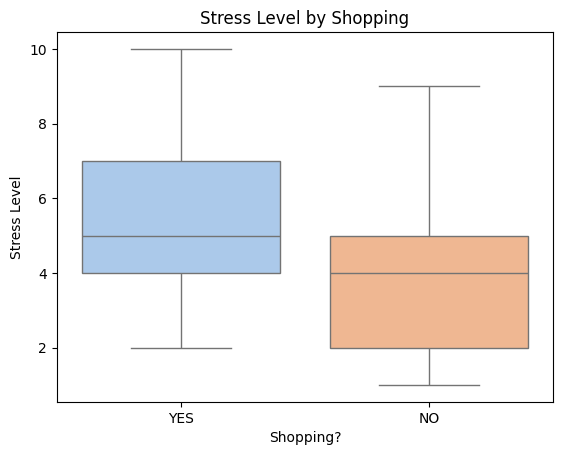

In [17]:
#Stress level by shopping status
sns.boxplot(x="Shopping?", y="Stress Level", data=df, palette="pastel")
plt.title("Stress Level by Shopping")
plt.show()
#The average stress level tends to be higher on days when shopping occurred. This suggests that shopping may be used as a stress relief mechanism.

<ipython-input-19-3c69a68853bf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Impulse/Planned", y="Stress Level", data=df, palette="cool")


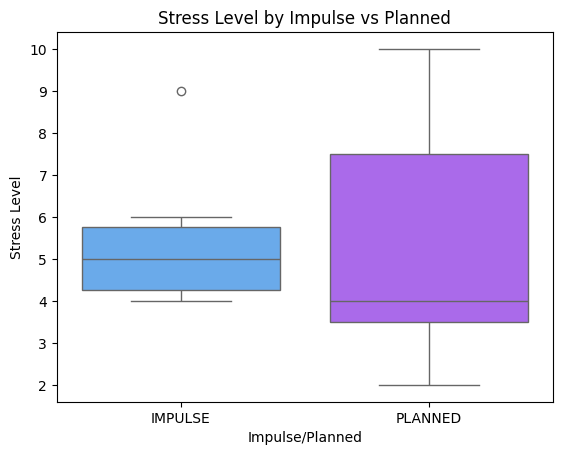

In [19]:
#Impulse/Planned
sns.boxplot(x="Impulse/Planned", y="Stress Level", data=df, palette="cool")
plt.title("Stress Level by Impulse vs Planned")
plt.show()
#Stress levels are higher on days when purchases were impulsive rather than planned.
#This supports the idea that high stress may lead to less controlled shopping decisions.

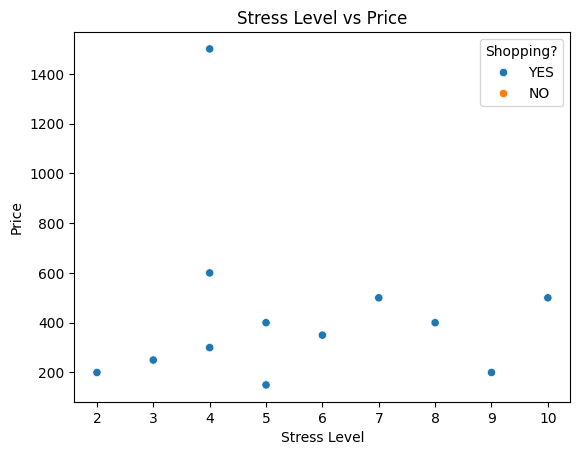

In [20]:
#Stress Level vs Price (Scatter Plot)
sns.scatterplot(x="Stress Level", y="Price", hue="Shopping?", data=df)
plt.title("Stress Level vs Price")
plt.show()
#There is a visible trend showing that as stress increases, the amount spent might increase as well — especially for impulse purchases.
#It’s not a strong correlation, but the pattern is notable.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127780 (\N{WHITE SUN WITH SMALL CLOUD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127783 (\N{CLOUD WITH RAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127788 (\N{WIND BLOWING FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


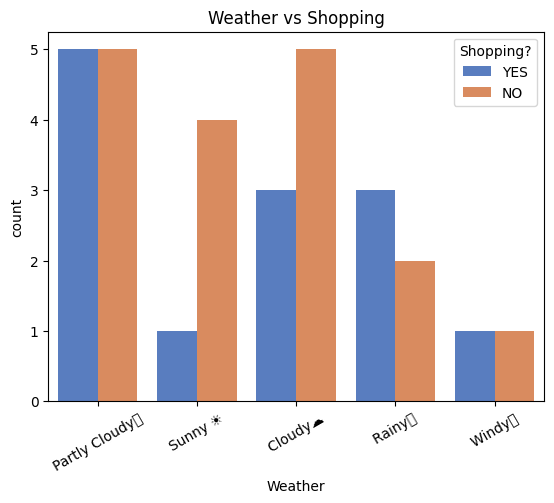

In [21]:
#Weather vs Shopping Behavior
sns.countplot(x="Weather", hue="Shopping?", data=df, palette="muted")
plt.title("Weather vs Shopping")
plt.xticks(rotation=30)
plt.show()
#On "Partly Cloudy" and "Rainy" days, shopping frequency seems slightly higher.
#This could imply that weather conditions influence mood and encourage retail therapy.



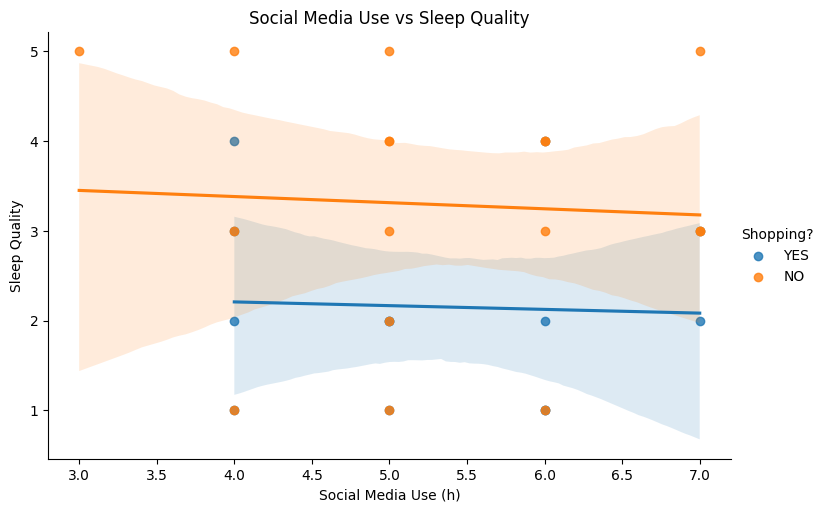

In [22]:
#Social Media Use vs Sleep Quality
sns.lmplot(x="Social Media Use (h)", y="Sleep Quality", hue="Shopping?", data=df, aspect=1.5)
plt.title("Social Media Use vs Sleep Quality")
plt.show()
#There is a subtle negative trend — the more time spent on social media, the lower the reported sleep quality.
#This could suggest a potential indirect link to higher stress and emotional shopping.

<ipython-input-26-fdf47b34dfe9>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x="Impulse/Planned", y="Stress Level", hue="Shopping?", data=df, ci="sd", palette="Set3")


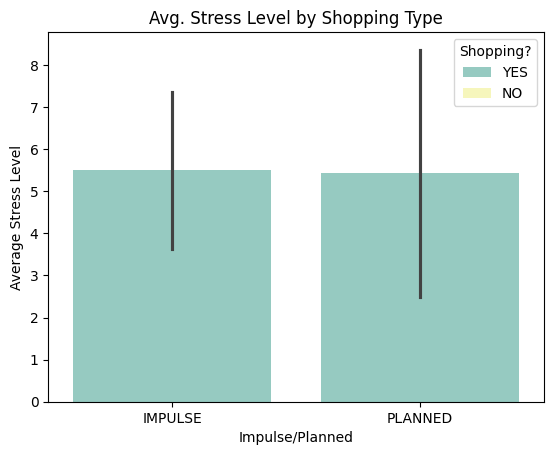

In [26]:
#Average Stress Level by Shopping Type (Grouped Bar Plot)
sns.barplot(x="Impulse/Planned", y="Stress Level", hue="Shopping?", data=df, ci="sd", palette="Set3")
plt.title("Avg. Stress Level by Shopping Type")
plt.ylabel("Average Stress Level")
plt.show()
#Impulse shopping days consistently have higher stress levels than planned shopping or non-shopping days,
#suggesting stress is a significant trigger for impulsive spending.

<ipython-input-27-eaf01e4182e4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Impulse/Planned", y="Price", data=df[df["Shopping?"] == "YES"], palette="coolwarm")


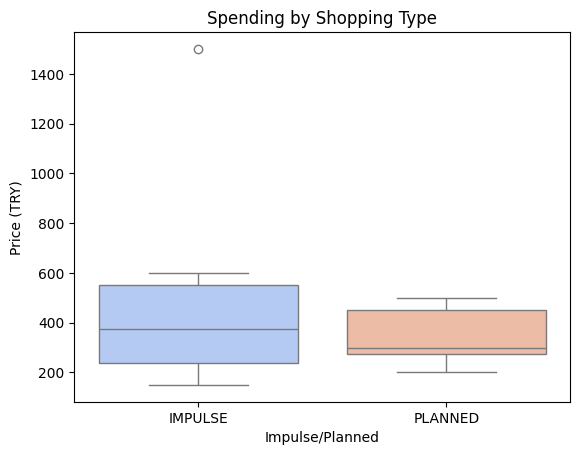

In [27]:
#Boxplot of price by shopping type
sns.boxplot(x="Impulse/Planned", y="Price", data=df[df["Shopping?"] == "YES"], palette="coolwarm")
plt.title("Spending by Shopping Type")
plt.ylabel("Price (TRY)")
plt.show()
#Impulsive purchases tend to involve higher price variation and outliers — a sign of emotionally-driven, less controlled buying.

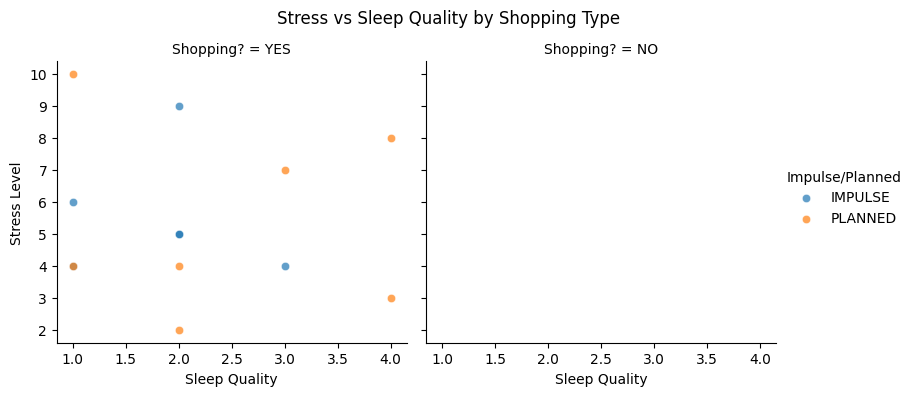

In [28]:
#Facet Grid: Stress vs Sleep by Shopping Behavior
g = sns.FacetGrid(df, col="Shopping?", hue="Impulse/Planned", height=4)
g.map(sns.scatterplot, "Sleep Quality", "Stress Level", alpha=0.7)
g.add_legend()
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Stress vs Sleep Quality by Shopping Type")
plt.show()
#Lower sleep quality is linked to higher stress — and those days are more likely to include impulse shopping.

<ipython-input-29-b2853edd4982>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Shopping?", y="Social Media Use (h)", data=df, palette="muted", inner="quartile")


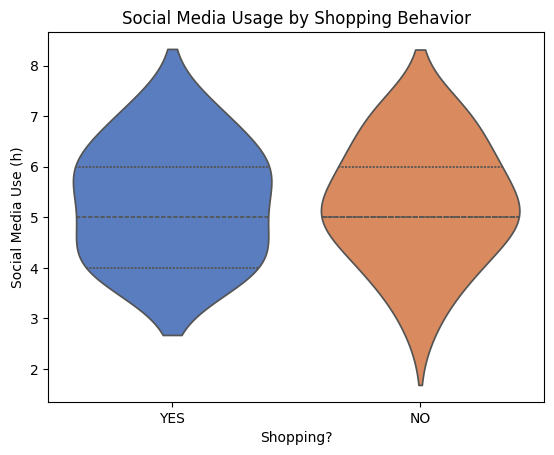

In [29]:
#Violin Plot: Social Media Use by Shopping Behavior
sns.violinplot(x="Shopping?", y="Social Media Use (h)", data=df, palette="muted", inner="quartile")
plt.title("Social Media Usage by Shopping Behavior")
plt.show()
#Shopping days tend to have more social media use — possibly due to mood triggers or exposure to consumer content.

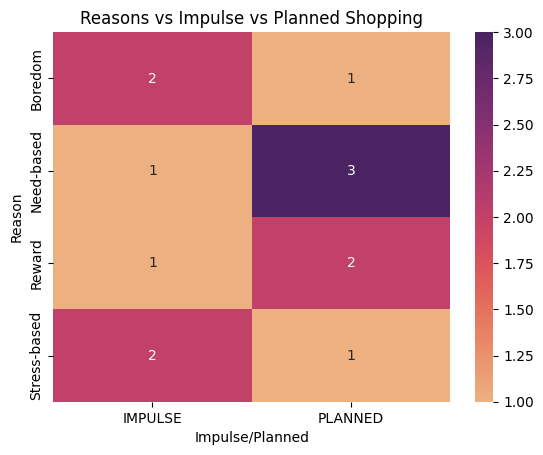

In [30]:
#Heatmap of Impulse Shopping Triggers
pivot = pd.crosstab(df["Reason"], df["Impulse/Planned"])
sns.heatmap(pivot, annot=True, fmt="d", cmap="flare")
plt.title("Reasons vs Impulse vs Planned Shopping")
plt.show()
#Boredom and reward are dominant triggers for impulse shopping, while planned purchases are often driven by necessity or timing.

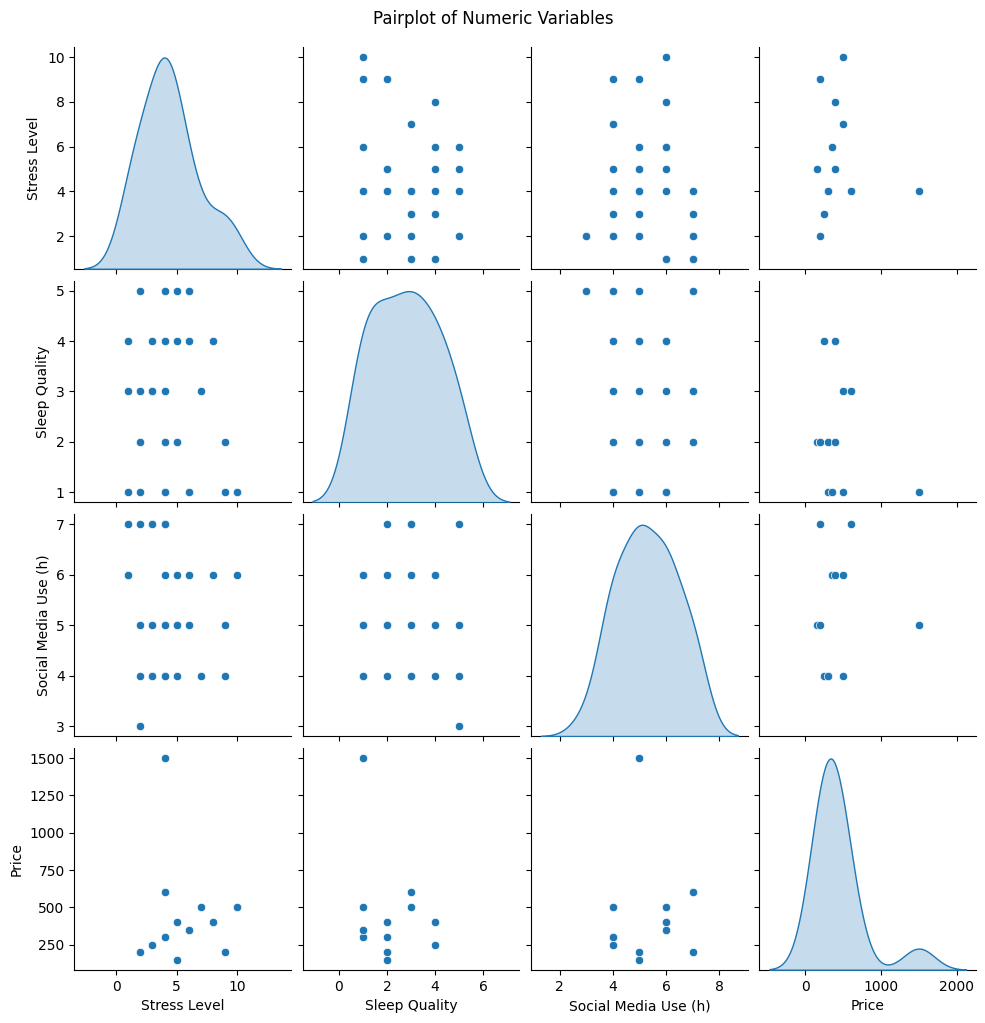

In [31]:
#Multi-variable Pairplot (Correlations Overview)
sns.pairplot(df[["Stress Level", "Sleep Quality", "Social Media Use (h)", "Price"]], diag_kind="kde")
plt.suptitle("Pairplot of Numeric Variables", y=1.02)
plt.show()
#Reveals all pairwise trends, such as negative relationship between sleep & stress, or stress & price. Great for discovering subtle patterns.

info dtypes summary, raporu devam ettir, hypothesis testing